# 1. EDA

## Data load & Analysis

In [1]:
# for colab
# cd '/content/drive/MyDrive'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('cs_data.csv', index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Text(0.5, 1.0, 'Binary Class Comparison')

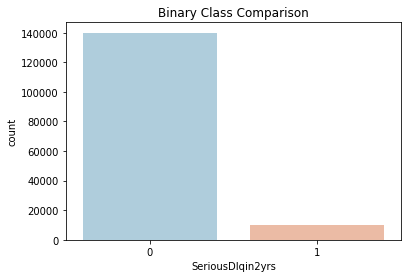

In [5]:
sns.countplot(x='SeriousDlqin2yrs', data=data, palette='RdBu_r')
plt.title('Binary Class Comparison')

In [6]:
data['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [7]:
data['NumberOfTimes90DaysLate'].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [8]:
data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [9]:
data['NumberOfDependents'].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

### **Analysis**
- 먼저 data를 load하면서 전체적인 요소 및 값들의 분포를 파악했다.

- 첫 번째로 target data (SeriousDlqin2yrs)에 대한 불균형도가 심한 것을 확인 할 수 있다. 이는 추후에 불균형된 학습을 유발 할 수 있으므로, 이를 해소하기 위한 방법으로 imblearn에서 SMOTE 모듈을 이용해 oversampling 통해서 어느 정도 해소해볼 예정이다.

- 두 번째로 돈을 연체하게 된 data를 살펴 보았는데, 96과 98이라는 이상치로 보이는 숫자가 있어 이를 값을 대체하거나 삭제할 예정이다.

## Data Visualization
- Data의 각종 요소별 시각화를 진행했다.

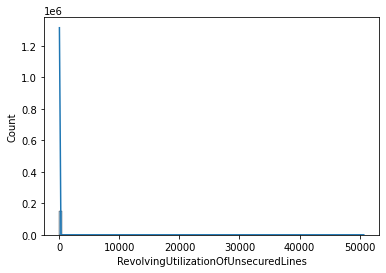

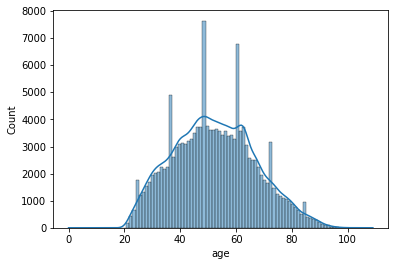

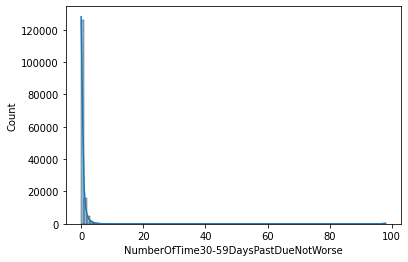

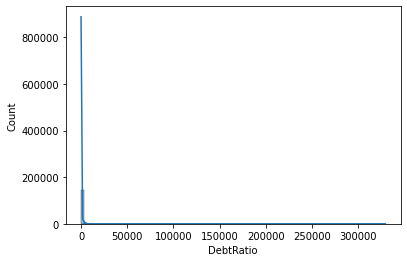

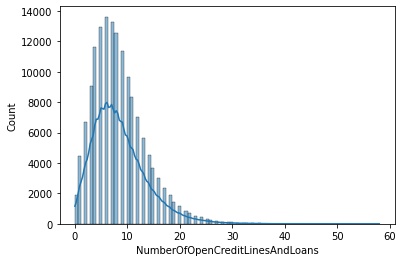

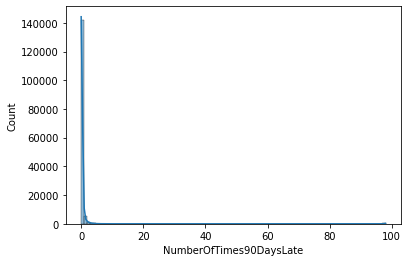

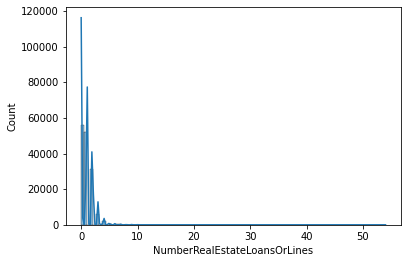

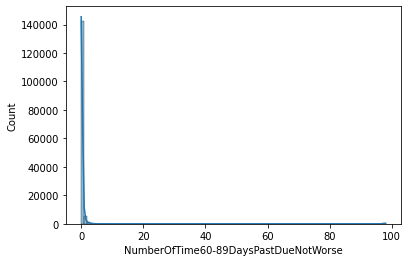

In [10]:
# remove target variable Dlqin2yrs and variables with missing values
feature_list = list(data.columns.values)
remove_list = ['SeriousDlqin2yrs','MonthlyIncome','NumberOfDependents']
for each in remove_list:
    feature_list.remove(each)

for each in feature_list:
    sns.histplot(data[each], kde=True, bins=100)
    plt.show()

**Analysis**
- RevolvingUtilizationOfUnsecuredLines
- NumberOfTime30-59DaysPastDueNotWorse
- DebtRatio
- NumberOfTimes30DaysLate
- NumberRealEstateLoansOrLines
- NumberOfTime60-89DaysPastDueNotWorse

위의 6가지 속성에 대해서는 매우 편향된 분포를 가지고 있음을 파악할 수 있었다.

### DebtRatio (Boxplot)

In [11]:
data['DebtRatio'].value_counts()

0.000000    4113
1.000000     229
4.000000     174
2.000000     170
3.000000     162
            ... 
0.368763       1
0.108009       1
0.441337       1
1.006015       1
0.249908       1
Name: DebtRatio, Length: 114194, dtype: int64

In [12]:
data[data['DebtRatio'] > 1].value_counts()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio    MonthlyIncome  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents
0                 0.000000                              21   0                                     2.000000     1.0            1                                0                        0                             0                                     0.0                   1
                  0.585153                              48   0                                     1.503747     1200.0         4                                0                        1                             0                                     2.0                   1
                  0.590404                              35   0                                     1.058824     4368.0         5                                0             

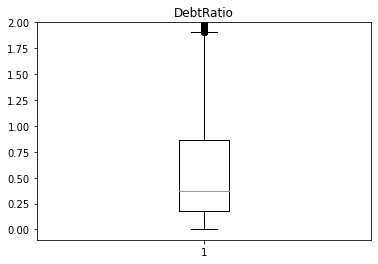

In [13]:
plt.boxplot(data['DebtRatio'])
plt.title('DebtRatio')
plt.ylim(-0.1, 2)
plt.show()

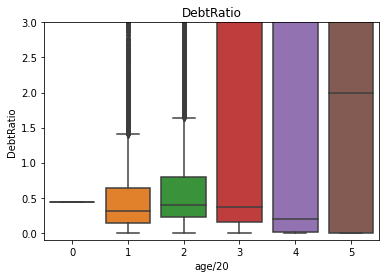

In [14]:
data_sample = data.copy()
data_sample['age/20'] = data_sample[['age']].applymap(lambda x : int(x/20))
sns.boxplot(x='age/20', y='DebtRatio', data=data_sample)
plt.title('DebtRatio')
plt.ylim(-0.1, 3.0)
plt.show()

In [15]:
data_sample[(data_sample['age/20']>=3) & (data_sample['DebtRatio']>1.)].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age/20
count,14056.000000,14056.000000,14056.000000,14056.000000,14056.000000,1934.000000,14056.000000,14056.000000,14056.000000,14056.000000,12228.000000,14056.000000
mean,0.029240,4.702026,69.641577,0.149260,1348.151022,2236.593588,8.244806,0.050797,0.938745,0.041121,0.166667,3.131759
std,0.168485,146.801266,7.879031,0.995645,4683.580781,3121.107817,5.183441,0.893541,1.218564,0.860461,0.531369,0.339710
min,0.000000,0.000000,60.000000,0.000000,1.000874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,0.013231,63.000000,0.000000,36.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.050383,68.000000,0.000000,666.000000,1400.000000,7.000000,0.000000,1.000000,0.000000,0.000000,3.000000
75%,0.000000,0.213127,75.000000,0.000000,1868.000000,3232.250000,11.000000,0.000000,1.000000,0.000000,0.000000,3.000000
max,1.000000,11553.000000,109.000000,98.000000,329664.000000,70000.000000,45.000000,98.000000,32.000000,98.000000,6.000000,5.000000


In [16]:
data.loc[data['age'] == 0, 'age'] = data['age'].median()

### **Analysis**
violin plot을 이용하여 연령별 DebtRatio를 파악해보았다. 그 결과, 60대 이상 (3번째 boxplot)에서 DebtRatio가 1을 넘어가는 값을 보였다. 이를 통해 data값이 잘못된 것일 지, 이 나이대에 특성이 그러한 지를 파악해 볼 필요가 있어 보였다.

그리고 추가적으로 나이가 '0'인 값에 대해서는 있을 수 없는 값으로 판단하여, 중간값으로 대체했다.

### RevolvingUtilizationOfUnsecuredLines (Boxplot)

In [17]:
data['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [18]:
data[data['RevolvingUtilizationOfUnsecuredLines'] > 1].value_counts()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents
0                 1.000059                              47   0                                     0.375102   9775.0         5                                1                        2                             0                                     3.0                   1
1                 1.008430                              26   0                                     0.037537   4075.0         4                                0                        0                             2                                     1.0                   1
                  1.007713                              43   0                                     0.235135   3699.0         6                                0                     

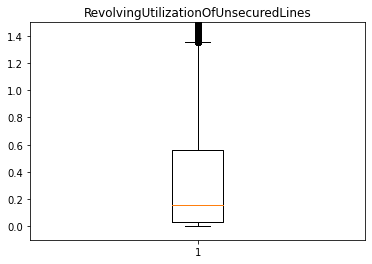

In [19]:
plt.boxplot(data['RevolvingUtilizationOfUnsecuredLines'])
plt.title('RevolvingUtilizationOfUnsecuredLines')
plt.ylim(-0.1, 1.5)
plt.show()

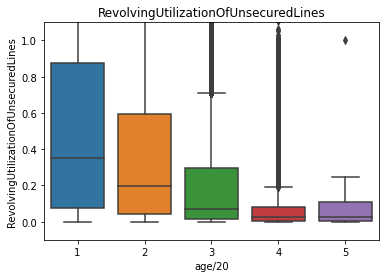

In [20]:
data_sample = data.copy()
data_sample['age/20'] = data_sample[['age']].applymap(lambda x : int(x/20))
sns.boxplot(x='age/20', y='RevolvingUtilizationOfUnsecuredLines', data=data_sample)
plt.title('RevolvingUtilizationOfUnsecuredLines')
plt.ylim(-0.1, 1.1)
plt.show()

### **Analysis**
위와 마찬가지로 boxplot을 이용해 연령별로 현재 운용 가능한 현금의 비율을 살펴 보았다. 물론 비율이 1을 넘어가는 값은 이상치라고 생각되며, 적절한 값으로 대체를 하거나 삭제할 필요성은 있어 보인다. 연령은 높아질 수로 현재 운용가능한 현금의 비율이 낮아지는 것을 확인 할 수 있었고, 40~80대에서는 이상치로 판단 되는 값이 많은 것을 또한 확인했다.

### Age (Pie chart)

In [21]:
age_df = pd.DataFrame(data.age)
age_df.head()

,age
1,45
2,40
3,38
4,30
5,49


In [22]:
# 20살 단위로 group화
age_df['age/20'] = age_df[['age']].applymap(lambda x : int(x/20))
age_df_count = age_df.groupby(['age/20'])['age/20'].count()
age_df_count.index = ['20<=age<40', '40<=age<60', '60<=age<80', '80<=age<100', '100<=age']
age_df_count.column = ['count']
age_df_count

20<=age<40     32003
40<=age<60     69679
60<=age<80     42506
80<=age<100     5799
100<=age          13
Name: age/20, dtype: int64

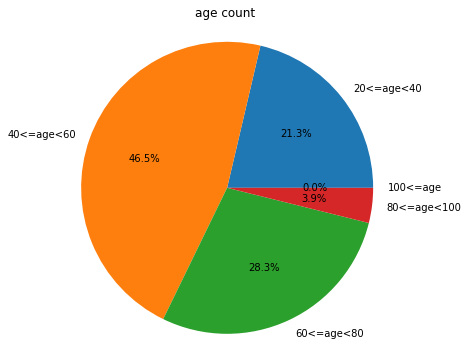

In [23]:
# data visualization
plt.figure(figsize=(7, 6))
plt.pie(age_df_count.values, labels=age_df_count.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('age count')
plt.show()

### **Analysis**
전체적인 나이 분포를 확인해본 결과, 40 ~ 60살 정도가 46.5% 이상의 높은 비율을 가지고 있었고 다음으로 60 ~ 80살이 28.3%로 40살 이상에서 약 75%가 넘는 분포를 가지고 있었다. 그 다음으로 20 ~ 40살 정도에서 약 21%의 비율을 차지했음을 알 수 있었다.

### SeriousDlqin2yrs (Violin Plot)

In [24]:
df_SeriousDlqin2yrs = pd.DataFrame(data.SeriousDlqin2yrs)
df_SeriousDlqin2yrs.head()

,SeriousDlqin2yrs
1,1
2,0
3,0
4,0
5,0


In [25]:
data['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

C:\Users\ChangHo Kim\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


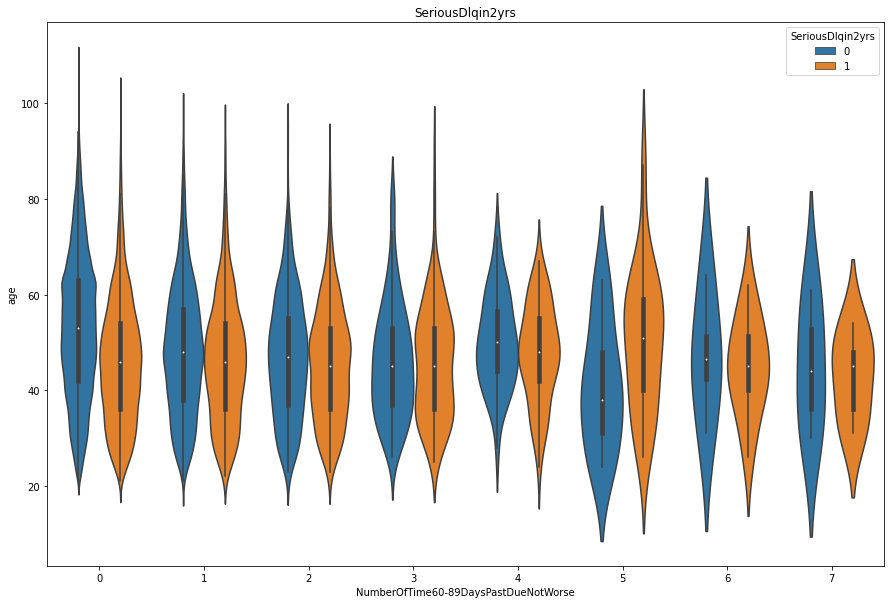

In [26]:
plt.figure(figsize=(15, 10))
sns.violinplot('NumberOfTime60-89DaysPastDueNotWorse', 'age', hue='SeriousDlqin2yrs', data=data[data['NumberOfTime60-89DaysPastDueNotWorse'] < 8])
plt.title('SeriousDlqin2yrs')
plt.show()

### **Analysis**
violin plot을 이용하여 최근 2년간 60 ~ 89일 연체한 횟수에 따른 2년 동안 90일 이상 연체 여부를 파악해보려고 했다. 하지만 위의 그림과 같이 60 ~ 89일 연체한 횟수에 대해 이상치 (outlier)로 보이는 것이 탐지가 되었다.

이를 value_counts()를 통해서 다시 본 결과, 2년간 연체한 횟수가 98, 96번이라는 답변이 **264명과 5명**으로 조사되어 있다는 것을 파악했다. 이에 대한 값을 아예 **삭제를 할 것인지, 아니면 값을 대체할 지를** 결정이 필요해 보인다.

그리고 그림을 통해서 outlier 등을 제외한 나머지 분포를 살펴보았을 때에, 연체를 한 사람이 **가운데 연령대**에서 조금 더 높은 비율을 가진 것을 확인했습니다.

## 결측치 파악

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [28]:
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

### **Analysis**
결측치 (NA)에 대한 분석이다. 총 2개의 요소에서 결측치가 발생했다. (MonthlyIncome, NumberOfDependents) 특히, 월 수입에 대한 결측치는 거의 3만개에 가까운 숫자이기에 삭제하기에는 무리가 있다고 판단되었다. 그리고 부양 가족의 수도 그냥 삭제하기 보다는 데이터 전체의 평균 등으로 대체하여 사용할 예정이다.

구체적으로 위의 상관 관계(heat map)에서 볼 수 있듯이, MonthlyIncome은 NumberRealEstateLoansOrLines에서 그나마 높은 상관 관계를 가지기에 각 값 별로 가지고 있는 월 평균 수입을 MonthlyIncome 값으로 대체할 예정이다.

다음으로 NumberOfDependents의 경우, age와 음의 상관 관계이지만 관련성이 높아 보이므로 나이대에 따른 NumberOfDependents를 적용하거나 삭제할 예정이다.

## Data preprocessing

In [29]:
data_1 = data.copy()
data_1.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


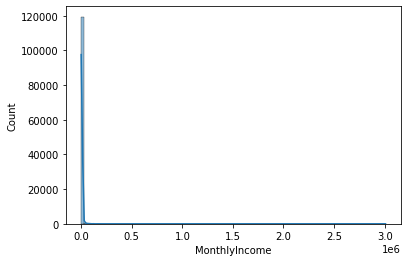

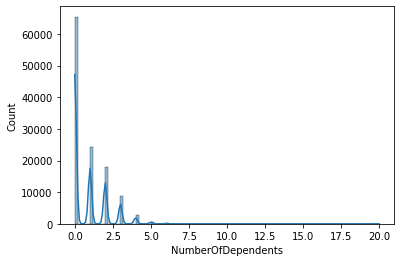

In [30]:
partial_data_1 = data_1[['MonthlyIncome','NumberOfDependents']]
#partial_data_1.dropna(how='any')
partial_data_1 = partial_data_1.dropna(how='any')

sns.histplot(partial_data_1['MonthlyIncome'], kde=True, bins=100)
plt.show()
sns.histplot(partial_data_1['NumberOfDependents'], kde=True, bins=100)
plt.show()

### 결측치 처리 : NumberOfDependents

In [31]:
data_1['age/10'] = data_1[['age']].applymap(lambda x : int(x/10))
data_1.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age/10
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,4
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,4
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,3
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,3
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,4


In [32]:
mean_df = data_1.groupby('age/10')['NumberOfDependents'].mean()
mean_df = round(mean_df)
mean_df

age/10
2     0.0
3     1.0
4     1.0
5     1.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
Name: NumberOfDependents, dtype: float64

In [33]:
# NumberOfDependents의 결측치 채우기
for j in range(0, 11):
    for i in mean_df:
        data_1.loc[(data_1['NumberOfDependents'].isnull()) & (data_1['age/10'] == j),
                    'NumberOfDependents'] = round(i)

In [34]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
 11  

### 결측치 처리 : MonthlyIncome

In [35]:
mean_df1 = data_1.loc[data_1['SeriousDlqin2yrs'] == 0, 'MonthlyIncome'].groupby(data_1['age/10']).mean()
mean_df1, mean_df1.shape

(age/10
 2     2999.883430
 3     5577.010729
 4     7319.504950
 5     7854.726798
 6     7488.072723
 7     5768.068784
 8     5313.903383
 9     5757.194366
 10    1996.800000
 Name: MonthlyIncome, dtype: float64,
 (9,))

In [36]:
mean_df2 = data_1.loc[data_1['SeriousDlqin2yrs'] == 1, 'MonthlyIncome'].groupby(data_1['age/10']).mean()
mean_df2, mean_df2.shape

(age/10
 2     2898.832524
 3     5000.628413
 4     6131.941922
 5     6683.833684
 6     6105.761176
 7     5363.187500
 8     4582.025316
 9     8938.375000
 10    2883.000000
 Name: MonthlyIncome, dtype: float64,
 (9,))

In [37]:
# MonthlyIncome 결측치 채우기

for i in mean_df1:
  for j in range(2, 11):
    data_1.loc[(data_1['SeriousDlqin2yrs'] == 0) & (data_1['MonthlyIncome'].isnull()) & (data_1['age/10'] == j),
              'MonthlyIncome'] = i

for i in mean_df2:
  for j in range(2, 11):
    data_1.loc[(data_1['SeriousDlqin2yrs'] == 1) & (data_1['MonthlyIncome'].isnull()) & (data_1['age/10'] == j),
              'MonthlyIncome'] = i

In [38]:
data_1.drop('age/10', axis=1, inplace=True)
data_1.shape

(150000, 11)

In [39]:
data_1.isna().any()

SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                           False
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                      False
dtype: bool

### Result
NumberOfDependents와 MonthlyIncome의 결측치를 위와 같이 다 채우는 방향으로 진행하였다.

구체적으로 NumberOfDependents의 경우에는 age를 10살 기준으로 나누어 각 평균값을 구하고, 각 나이가 해당되는 연령의 결측치에 평균값(int)으로 채웠다.

다음으로 MonthlyIncome는 SeriousDlqin2yrs와 연령별 기준에 대한 MonthlyIncome 평균값을 구했다. 이를 각 해당하는 대출 건수에 대한 결측치를 채웠다.

## Outlier (이상치)

In [40]:
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  
  lowest = quantile_25 - IQR*weight
  highest = quantile_75 + IQR*weight
  lowest_outlier_idx = df[column][df[column] < lowest].index
  highest_outlier_idx = df[column][df[column] > highest].index
  return lowest, highest, lowest_outlier_idx, highest_outlier_idx

### 이상치 제거 : RevolvingUtilizationOfUnsecuredLines

- Data 이상치라고 판단되는 값을 Max. value로 대체함

In [41]:
# lowest, highest value 및 index 확인
lowest, highest, lowest_outlier_idx, highest_outlier_idx = get_outlier(data_1, 'RevolvingUtilizationOfUnsecuredLines')
lowest, highest, lowest_outlier_idx, highest_outlier_idx.shape

(-0.7639007662499999, 1.35281445575, Int64Index([], dtype='int64'), (763,))

In [42]:
# replace value
data_1.loc[data_1['RevolvingUtilizationOfUnsecuredLines'] > highest, 'RevolvingUtilizationOfUnsecuredLines'] = highest

In [43]:
# 결과 확인
data_1[data_1['RevolvingUtilizationOfUnsecuredLines'] > highest].value_counts()

Series([], dtype: int64)

### 이상치 제거 : DebtRatio

- Data의 속성상 **Highest** 이상의 숫자는 이상치를 대체함

In [44]:
# lowest, highest value 및 index 확인
lowest, highest, lowest_outlier_idx, highest_outlier_idx = get_outlier(data_1, 'DebtRatio')
lowest, highest, lowest_outlier_idx, highest_outlier_idx

(-0.8646960792499998,
 1.9080236847499998,
 Int64Index([], dtype='int64'),
 Int64Index([     7,      9,     15,     17,     33,     42,     45,     51,
                 59,     63,
             ...
             149961, 149964, 149966, 149968, 149976, 149977, 149978, 149985,
             149993, 149998],
            dtype='int64', length=31311))

In [45]:
# 이상치 값을 highest로 대체
data_1.loc[highest_outlier_idx, 'DebtRatio'] = highest

In [46]:
# 결과 확인
data_1.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,0.322261,52.295553,0.421033,0.663258,5.941611e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,0.249746,0.356572,14.771249,4.192781,0.688085,1.296355e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,2.999883e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,4.357500e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,1.352814,109.000000,98.000000,1.908024,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### 이상치 제거  : NumberOfTimes90DaysLate

- 위에서 확인한 것과 같이 96번과 98번 연체 횟수는 기간적 측면에서 볼 때 말이 되지 않는 값이라 outlier로 판단하고 데이터의 수 측면에서 크지 않다고 생각되어 삭제한다.

In [47]:
data_1[(data_1['NumberOfTimes90DaysLate'] == 98 ) | (data_1['NumberOfTimes90DaysLate'] == 96)].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,269.000000,2.690000e+02,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.0,269.000000,269.000000
mean,0.546468,9.999999e-01,34.245353,97.962825,0.202212,2732.623375,0.007435,97.962825,0.0,97.962825,0.327138
std,0.498764,1.112292e-16,13.061823,0.270628,0.582814,2043.114944,0.086065,0.270628,0.0,0.270628,0.789889
min,0.000000,9.999999e-01,21.000000,96.000000,0.000000,0.000000,0.000000,96.000000,0.0,96.000000,0.000000
25%,0.000000,9.999999e-01,24.000000,98.000000,0.000000,2000.000000,0.000000,98.000000,0.0,98.000000,0.000000
50%,1.000000,9.999999e-01,29.000000,98.000000,0.000000,2898.832524,0.000000,98.000000,0.0,98.000000,0.000000
75%,1.000000,9.999999e-01,43.000000,98.000000,0.000000,2999.883430,0.000000,98.000000,0.0,98.000000,0.000000
max,1.000000,9.999999e-01,79.000000,98.000000,1.908024,28733.000000,1.000000,98.000000,0.0,98.000000,5.000000


In [48]:
# 삭제할 index 추출 & 삭제
data_del_idx = data_1[(data_1['NumberOfTimes90DaysLate'] == 98) | (data_1['NumberOfTimes90DaysLate'] == 96)].index
data_1.drop(data_del_idx, inplace=True)
data_del_idx.shape, data_1.shape

((269,), (149731, 11))

In [49]:
# 결과 확인
data_1['NumberOfTimes90DaysLate'].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
13         4
15         2
14         2
12         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

### Result

- 각 속성에서 이상치로 판단 되는 값을 삭제 또는 대체하는 방향으로 진행.
 추가적으로 NumberRealEstateLoansOrLines에 54건수에 대한 데이터가 이상치로 보이지만 큰 영향은 안 줄 것으로 판단하고 진행했으며, 아래와 같이 정제된 data를 통해 다시 descibe 및 correlation을 파악하는 과정을 거침.

<AxesSubplot:title={'center':'correlation'}>

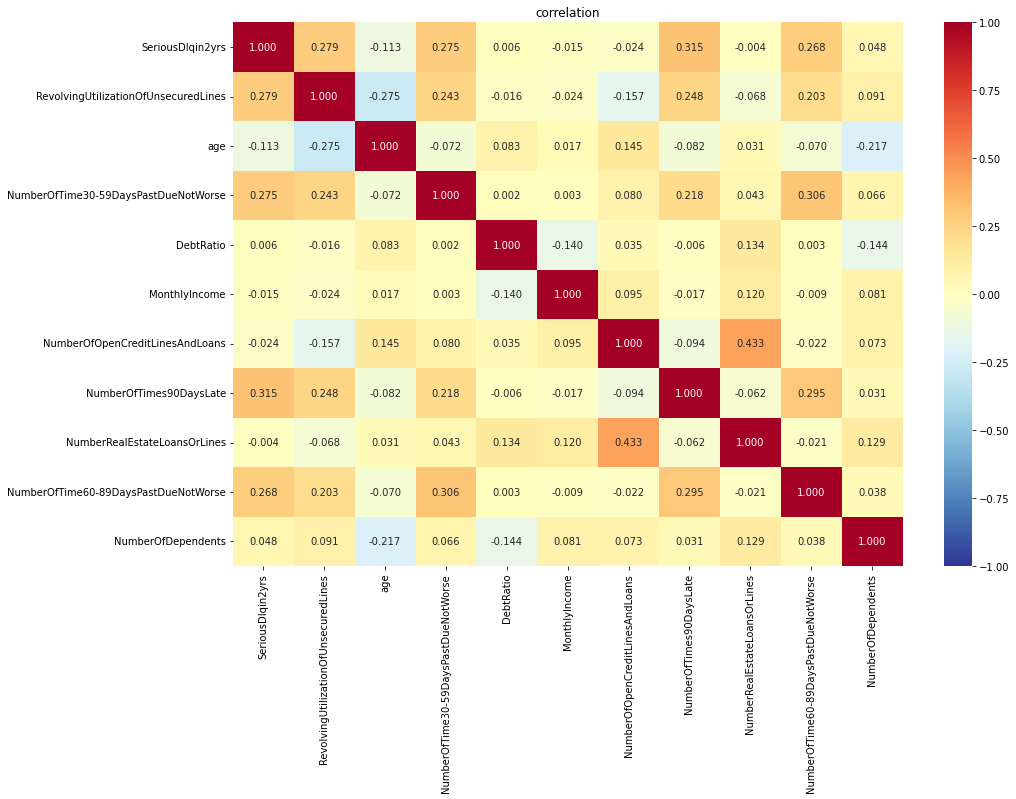

In [50]:
# column 별 상관 관계 분석
df_corr = data_1.corr()

plt.figure(figsize=(15, 10))
plt.title('correlation')
sns.heatmap(df_corr, 
            annot = True,      
            cmap = 'RdYlBu_r',
            fmt='.3f',
            vmin = -1, vmax = 1)

In [51]:
# drop_list = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse']

# for i in drop_list:
#     data_1.drop(i, axis=1, inplace=True)

### **Analysis**
각 요소들의 상관관계에 관한 heatmap은 위의 그림과 같다.

양의 상관 관계에서는 대표적으로 주택 담보대출을 포함한 부동산 담보 대출 건수(NumberRealEstateLoansOrLines)와 대출자가 보유중인 담보 대출 및 신용 대출 건수(NumberOfOpenCreditLinesAndLoans)가 **0.43** 정도의 상관 관계를 보였다.

다음으로 음의 상관 관계는 대표적으로 주택 담보대출을 포함한 부동산 담보 대출 건수 (NumberRealEstateLoansOrLines)와 나이(age)가 **-0.275** 정도를 보였음을 확인 할 수 있었다.

# 2. Base line model
## Import

In [52]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve, plot_confusion_matrix, roc_auc_score

In [53]:
def print_metrics_classifier(y, pred, title=None):
    """
    accuracy, recall, precision, f1 출력하는 함수
    [parameter]
    y : target (ndarray)
    pred : prediction (ndarray)
    title : (str)
    [Return]
    [Exception]
    """
    if title:
      print(title)
    print('정확도(Accuracy): ', accuracy_score(y, pred))
    print('재현률(Recall): ', recall_score(y, pred))
    print('정밀도(Precision): ', precision_score(y, pred))
    print('f1 score: ', f1_score(y, pred))
    print('roc_auc_score', roc_auc_score(y, pred))
    print()

### 결측치 Preprocessing 적용한 Data 활용

In [54]:
X = data_1.drop('SeriousDlqin2yrs', axis=1)
y = data_1['SeriousDlqin2yrs']

X.shape, y.shape

((149731, 10), (149731,))

In [55]:
# train / validataion / test set split & imbalanced data processing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=157,
                                                    stratify=y
                                                    )

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                test_size=0.2,
                                                random_state=157,
                                                stratify=y_train
                                                )

smt = SMOTE(random_state=157)
X_train, y_train = smt.fit_resample(X_train, y_train)

X_train.shape, X_val.shape, X_test.shape

((179010, 10), (23957, 10), (29947, 10))

In [56]:
# scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [57]:
grb = GradientBoostingClassifier(random_state=157)
grb.fit(X_train, y_train)

pred_train = grb.predict(X_train)
pred_val = grb.predict(X_val)

print_metrics_classifier(y_train, pred_train, 'grb train')
print_metrics_classifier(y_val, pred_val, 'grb validation')

grb train
정확도(Accuracy):  0.890022903748394
재현률(Recall):  0.8639182168593933
정밀도(Precision):  0.9115074500188608
f1 score:  0.8870750328386974
roc_auc_score 0.8900229037483939

grb validation
정확도(Accuracy):  0.8948115373377301
재현률(Recall):  0.5977229601518027
정밀도(Precision):  0.3340402969247084
f1 score:  0.4285714285714286
roc_auc_score 0.7567628029218076



In [58]:
rf = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=157)
rf.fit(X_train, y_train)

pred_train = rf.predict(X_train)
pred_val = rf.predict(X_val)

print_metrics_classifier(y_train, pred_train, 'RandomForest train')
print_metrics_classifier(y_val, pred_val, 'RandomForest validation')

RandomForest train
정확도(Accuracy):  0.8175967823026646
재현률(Recall):  0.8520082676945422
정밀도(Precision):  0.7971462917472429
f1 score:  0.8236647405087216
roc_auc_score 0.8175967823026646

RandomForest validation
정확도(Accuracy):  0.783069666485787
재현률(Recall):  0.7760910815939279
정밀도(Precision):  0.20214168039538716
f1 score:  0.3207423866161286
roc_auc_score 0.7798269136964991



In [59]:
lr = LogisticRegression(random_state=157)
lr.fit(X_train_scaled, y_train)

pred_train = lr.predict(X_train_scaled)
pred_val = lr.predict(X_val_scaled)

print_metrics_classifier(y_train, pred_train, 'LogisticRegression train')
print_metrics_classifier(y_val, pred_val, 'LogisticRegression validation')

LogisticRegression train
정확도(Accuracy):  0.7549745824255628
재현률(Recall):  0.7454443885816435
정밀도(Precision):  0.7599289285754963
f1 score:  0.75261697423634
roc_auc_score 0.7549745824255628

LogisticRegression validation
정확도(Accuracy):  0.7644112367992654
재현률(Recall):  0.7432005060088551
정밀도(Precision):  0.18322158116326212
f1 score:  0.29397047785839375
roc_auc_score 0.7545552047384283



In [60]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

pred_train = knn.predict(X_train_scaled)
pred_val = knn.predict(X_val_scaled)

print_metrics_classifier(y_train, pred_train, 'K-NN train')
print_metrics_classifier(y_val, pred_val, 'K-NN validation')

K-NN train
정확도(Accuracy):  0.895944360650243
재현률(Recall):  0.9388190603876878
정밀도(Precision):  0.8646738011936612
f1 score:  0.9002222995955754
roc_auc_score 0.895944360650243

K-NN validation
정확도(Accuracy):  0.7895813332220228
재현률(Recall):  0.6565464895635673
정밀도(Precision):  0.1875
f1 score:  0.29169593930026694
roc_auc_score 0.7277637703448869



In [61]:
xgb = XGBClassifier(random_state=157)
xgb.fit(X_train, y_train)

pred_train = xgb.predict(X_train)
pred_val = xgb.predict(X_val)

print_metrics_classifier(y_train, pred_train, 'xgb train')
print_metrics_classifier(y_val, pred_val, 'xgb validation')

C:\Users\ChangHo Kim\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:44:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb train
정확도(Accuracy):  0.9214177978883861
재현률(Recall):  0.900396625886822
정밀도(Precision):  0.9399127615404352
f1 score:  0.9197304376109149
roc_auc_score 0.9214177978883862

xgb validation
정확도(Accuracy):  0.9062069541261427
재현률(Recall):  0.5256166982922201
정밀도(Precision):  0.35695876288659795
f1 score:  0.42517267843438217
roc_auc_score 0.7293573301972363



In [62]:
# svc = SVC()
# svc.fit(X_train_scaled, y_train)

# pred_train = svc.predict(X_train_scaled)
# pred_val = svc.predict(X_val_scaled)

# print_metrics_classifier(y_train, pred_train, 'SVC train')
# print_metrics_classifier(y_val, pred_val, 'SVC validation')

# 3. Hyper-parameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

In [63]:
grb = GradientBoostingClassifier(random_state=157)

param = {
    'learning_rate': [0.1, 1],
    'n_estimators':range(500, 1001, 100),
    'max_depth': range(1, 4),
    'subsample':[0.5, 0.8, 1]
}

gs = RandomizedSearchCV(grb, 
                  param, 
                  scoring='accuracy', 
                  cv=4,
                  n_iter=60,
                  n_jobs=-1)

gs.fit(X_train, y_train)

In [ ]:
gs.best_estimator_, gs.best_score_

In [ ]:
df = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
df.head()

In [ ]:
best_grb = gs.best_estimator_
pred_train = best_grb.predict(X_train)
pred_val = best_grb.predict(X_val)

print_metrics_classifier(y_train, pred_train, 'grb train')
print_metrics_classifier(y_val, pred_val, 'grb validation')

In [ ]:
# 순서대로 pipeline 구성 : Feature scaling => lr로 학습/추론
# 각 프로세스 등록 ("이름", 객체)

order = [
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=157))
]
pipeline = Pipeline(order, verbose=True) # verbose=True : 어떤 단계 처리하는지 log를 남김
print(pipeline.steps)

param = {
    'lr__C':[0.001, 0.01, 0.1, 1, 10, 100],
    'lr__max_iter': range(100, 1001, 100)
}

gs = GridSearchCV(pipeline, 
                  param, 
                  scoring='accuracy', 
                  cv=5, 
                  n_jobs=-1)

gs.fit(X_train, y_train)

In [ ]:
gs.best_estimator_, gs.best_score_

In [ ]:
df = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
df.head()

In [ ]:
best_lr = gs.best_estimator_
pred_train = best_lr.predict(X_train)
pred_val = best_lr.predict(X_val)

print_metrics_classifier(y_train, pred_train, 'lr train')
print_metrics_classifier(y_val, pred_val, 'lr validation')

In [ ]:
rf = RandomForestClassifier()

param = {
    'n_estimators':[0.01, 0.1, 1, 10],
    'max_depth':[1, 2, 3, 4],
    'max_leaf_nodes':[5, 10, 15, 20, 30],
    'min_samples_leaf': range(500, 1001, 100)
}

gs = RandomizedSearchCV(rf, 
                param, 
                scoring='accuracy', 
                cv=4,
                n_iter=50,
                n_jobs=-1)

gs.fit(X_train, y_train)

In [ ]:
gs.best_estimator_, gs.best_score_

In [ ]:
df = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
df.head()

In [ ]:
best_rf = gs.best_estimator_
pred_train = best_rf.predict(X_train)
pred_val = best_rf.predict(X_val)

print_metrics_classifier(y_train, pred_train, 'RandomForest train')
print_metrics_classifier(y_val, pred_val, 'RandomForest validation')

In [ ]:
estimators = [
    ('lr', best_lr),
    ('grb', best_grb),
    ('rf', best_rf)
]

voting = VotingClassifier(estimators, voting='soft')
voting.fit(X_train, y_train)

pred_train = voting.predict(X_train)
pred_val = voting.predict(X_val)

print_metrics_classifier(y_train, pred_train, 'voting train')
print_metrics_classifier(y_val, pred_val, 'voting validation')

In [ ]:
pred_test = voting.predict(X_test)
print_metrics_classifier(y_test, pred_test)

### ROC_AUC curve

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(cm, # confusion matrix
                            display_labels=['SeriousDlqin2yrs: No', 'SeriousDlqin2yrs: Yes']) # [Negative label, Positive label]
disp.plot(cmap='Reds') # 출력

In [ ]:
# plot_roc_curve
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(12, 10))
plot_roc_curve(voting, X_test, y_test)

plt.legend(loc='lower right')
plt.title('ROC Curve')
plt.show()
plt.grid()
plt.show()